**Job Recommendation System**

**Introduction**

Job Recommendation System is a data-driven application that recommends jobs to users based on their skills and desired job roles. Platforms like LinkedIn use such systems to help users find suitable jobs efficiently. In this project, we’ll build a Python-based job recommendation system using a dataset with job titles, required skills, and other relevant features. The goal is to match users with jobs that align with their skills and preferences.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

**Data Import**

In [ ]:
df = pd.read_csv("marketing_sample.csv")

In [ ]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               29950 non-null  object
 4   Job Experience Required  29427 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
count,30000,30000,29425,29950,29427,28729,27695,29423,29427,29427,29099
unique,30000,28865,23884,1258,256,26909,206,2573,72,122,649
top,2b2ece7ba268973772dbcd2cb1ae9239,2019-08-04 02:01:21 +0000,Sales Executive,Not Disclosed by Recruiter,2 - 5 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer
freq,1,5,120,19731,2002,102,8551,4986,7400,10012,6396


In [ ]:
df.isnull().sum()

,0
Uniq Id,0
Crawl Timestamp,0
Job Title,575
Job Salary,50
Job Experience Required,573
Key Skills,1271
Role Category,2305
Location,577
Functional Area,573
Industry,573


In [ ]:
df.describe

<bound method NDFrame.describe of                                 Uniq Id            Crawl Timestamp  \
0      9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1      3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2      ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3      7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4      2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   
...                                 ...                        ...   
29995  3510f2146b514f112eaa9706a16b3900  2019-07-06 21:12:51 +0000   
29996  4af8c56f5b4c535b1974065003f2d548  2019-08-05 23:55:08 +0000   
29997  43d5b806b26ed99d3ebfc8f366b4cdd1  2019-08-05 09:41:29 +0000   
29998  8bc87d14cf56564f16b6d4bae80180be  2019-08-06 01:44:55 +0000   
29999  9c7045d111814a6f39fe461eab2b0bf8  2019-07-06 22:24:55 +0000   

                                               Job Title  \
0                                  Digital Media Planner   
1                               Online Bidding Executive   
2       Trainee Research/ Research Executive- Hi- Tec...   
3                                      Technical Support   
4                      Software Test Engineer -hyderabad   
...                                                  ...   
29995                              MTS-Software-Engineer   
29996                        Client Relationship Manager   
29997                                   Assoc. Prof.- CS   
29998         Application/Cyber Security Specialist-Pune   
29999                         Press Release Writer - SEO   

                         Job Salary Job Experience Required  \
0       Not Disclosed by Recruiter               5 - 10 yrs   
1       Not Disclosed by Recruiter                2 - 5 yrs   
2       Not Disclosed by Recruiter                0 - 1 yrs   
3          2,00,000 - 4,00,000 PA.                0 - 5 yrs   
4       Not Disclosed by Recruiter                2 - 5 yrs   
...                             ...                     ...   
29995   Not Disclosed by Recruiter               9 - 12 yrs   
29996   Not Disclosed by Recruiter                1 - 5 yrs   
29997   Not Disclosed by Recruiter                4 - 6 yrs   
29998   Not Disclosed by Recruiter               5 - 10 yrs   
29999   Not Disclosed by Recruiter                2 - 7 yrs   

                                              Key Skills  \
0                          Media Planning| Digital Media   
1       pre sales| closing| software knowledge| clien...   
2       Computer science| Fabrication| Quality check|...   
3                                      Technical Support   
4       manual testing| test engineering| test cases|...   
...                                                  ...   
29995   Graphics| C++| USB| Project management| SOC| ...   
29996   Service delivery| LMS| CRE| Integration servi...   
29997      Counselor| Mentor| Trainer| Advisor| Teaching   
29998   Security Analysis| Software Development Life ...   
29999   Press release| Public relations| Publishing| ...   

                                    Role Category   Location  \
0                                     Advertising     Mumbai   
1                                    Retail Sales  Pune,Pune   
2                                             R&D    Gurgaon   
3      Admin/Maintenance/Security/Datawarehousing     Mumbai   
4                            Programming & Design  Hyderabad   
...                                           ...        ...   
29995                        Programming & Design  Bengaluru   
29996                                  Operations    Chennai   
29997                            University Level     Howrah   
29998                        Programming & Design       Pune   
29999                    Online/Digital Marketing  Bengaluru   

                                         Functional Area  \
0      Marketing , Advertising , MR , PR , Media Plan...   
1                  Sales , Retail , B

**Data Visualization**

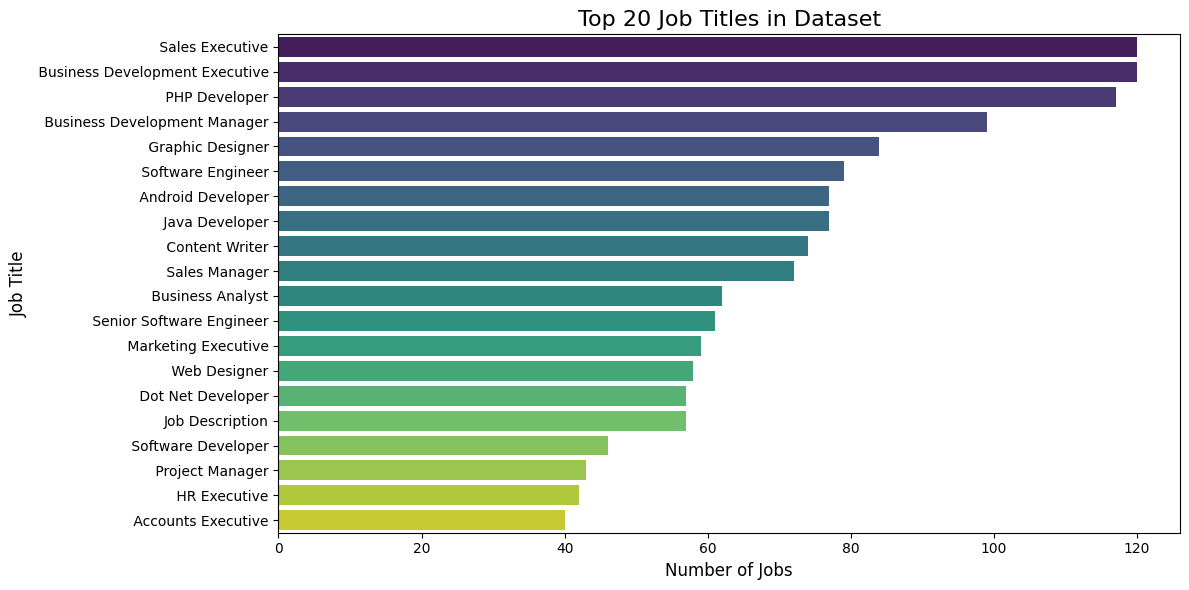

In [ ]:
top_jobs = df['Job Title'].value_counts().nlargest(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 20 Job Titles in Dataset", fontsize=16)
plt.xlabel("Number of Jobs", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.tight_layout()
plt.show()

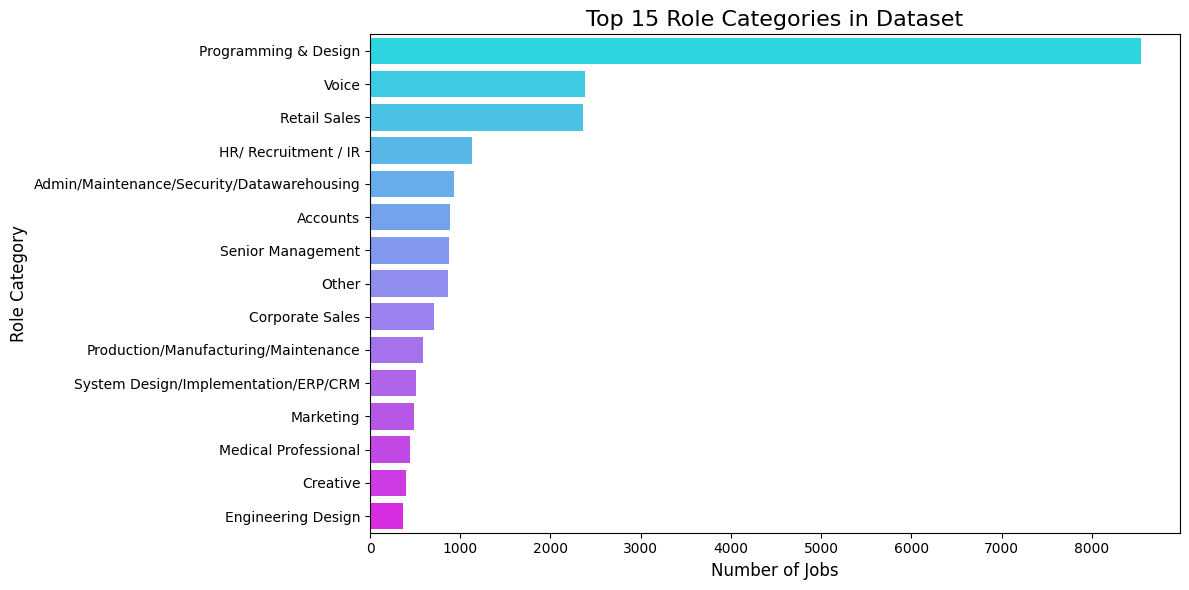

In [ ]:
top_roles = df['Role Category'].value_counts().nlargest(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette="cool")
plt.title("Top 15 Role Categories in Dataset", fontsize=16)
plt.xlabel("Number of Jobs", fontsize=12)
plt.ylabel("Role Category", fontsize=12)
plt.tight_layout()
plt.show()

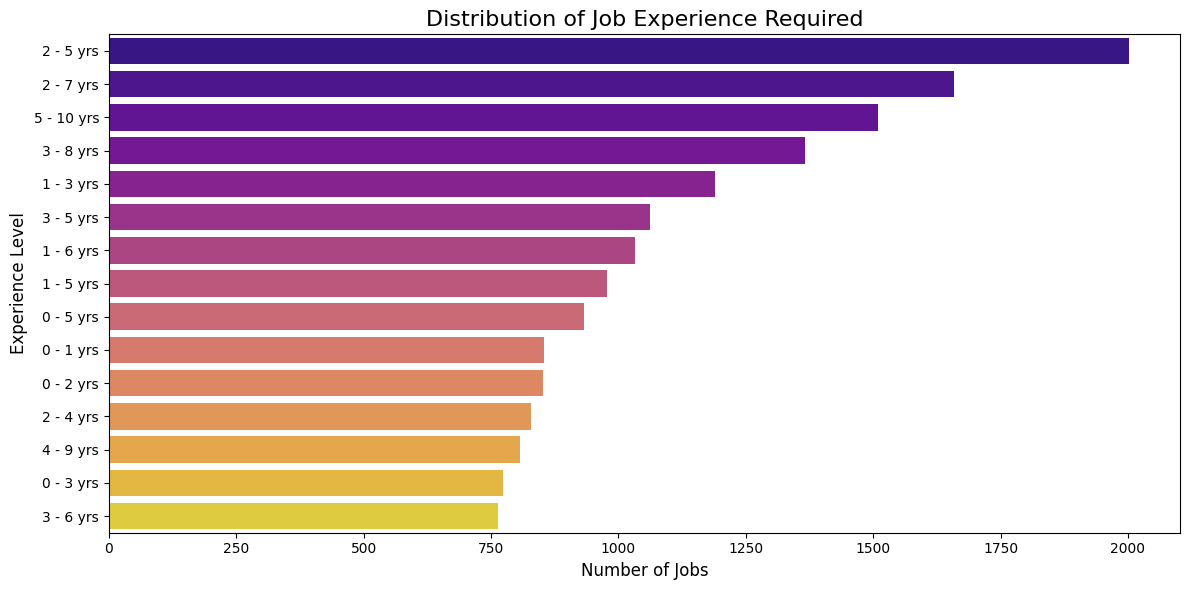

In [ ]:
experience_counts = df['Job Experience Required'].value_counts().nlargest(15)

plt.figure(figsize=(12,6))
sns.barplot(x=experience_counts.values, y=experience_counts.index, palette="plasma")
plt.title("Distribution of Job Experience Required", fontsize=16)
plt.xlabel("Number of Jobs", fontsize=12)
plt.ylabel("Experience Level", fontsize=12)
plt.tight_layout()
plt.show()

**Handling Missing Values**

In [ ]:
categorical_cols = ['Job Title', 'Job Salary', 'Job Experience Required',
                    'Key Skills', 'Role Category', 'Location',
                    'Functional Area', 'Industry', 'Role']

df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [ ]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [ ]:
df.isnull().sum()

,0
Uniq Id,0
Crawl Timestamp,0
Job Title,0
Job Salary,0
Job Experience Required,0
Key Skills,0
Role Category,0
Location,0
Functional Area,0
Industry,0


**WordCloud**

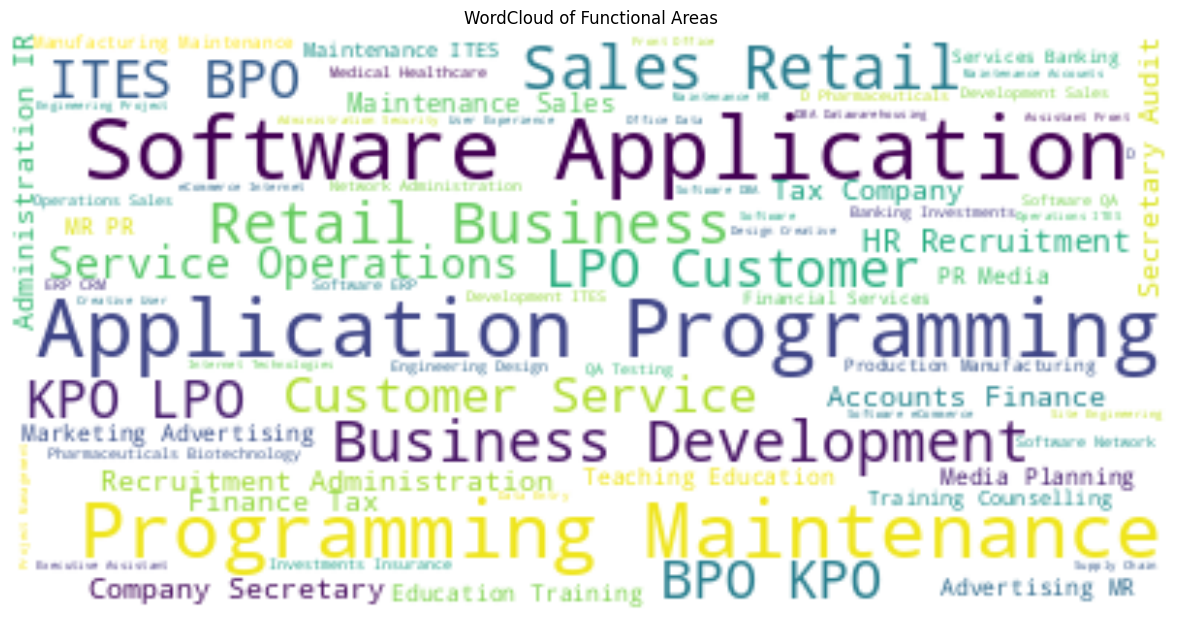

In [ ]:
text = " ".join(str(i) for i in df["Functional Area"].dropna())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Functional Areas")
plt.show()

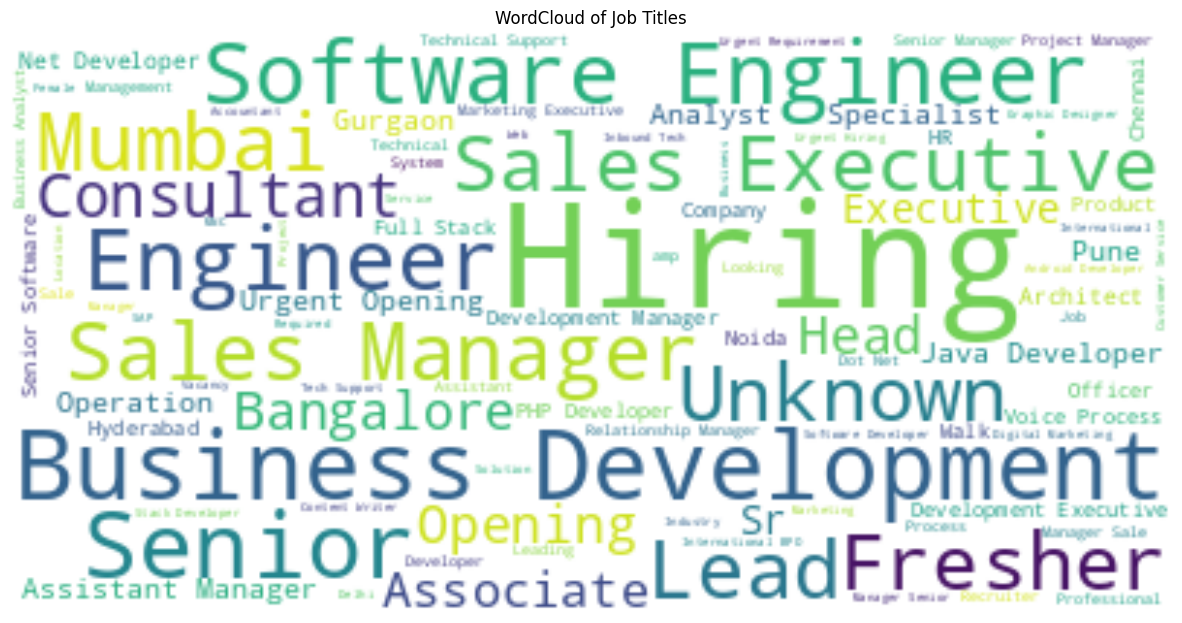

In [ ]:
text = " ".join(str(i) for i in df["Job Title"].dropna())
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Job Titles")
plt.show()

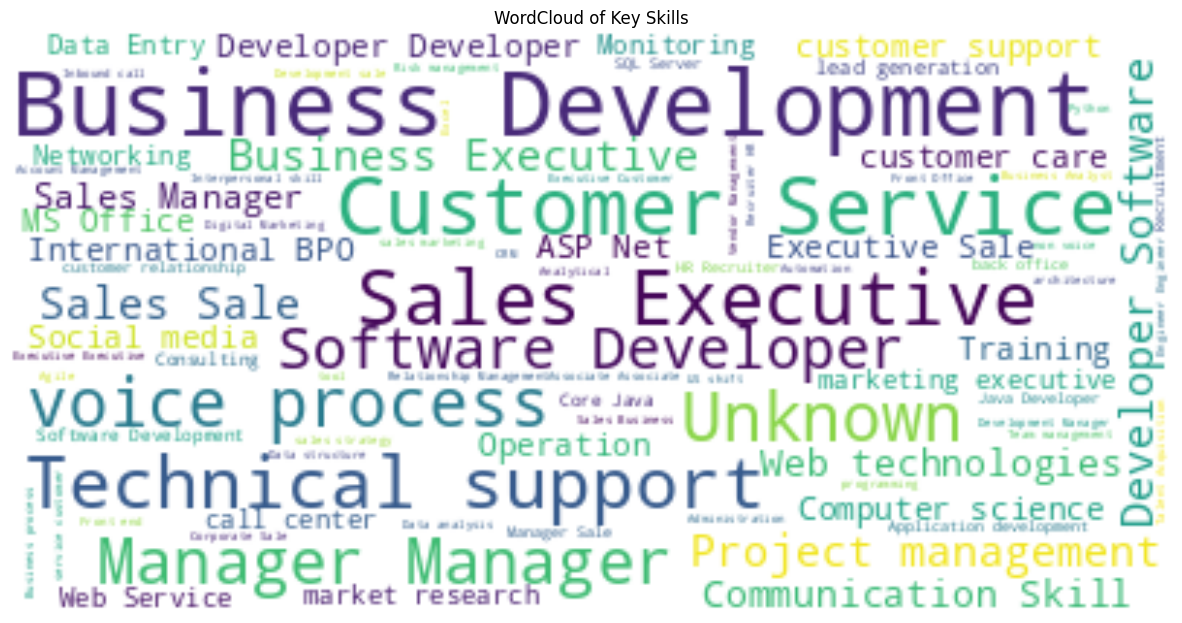

In [ ]:
text = " ".join(str(i) for i in df["Key Skills"].dropna())
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Key Skills")
plt.show()

**Deep Learning-Based Job Recommendation System**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# --- SAMPLE DATA TO REDUCE RAM USAGE ---
df_sample = df.sample(n=5000, random_state=42)  # 5000 örnek

# --- DROP ROWS WITH MISSING JOB TITLE ---
df_sample = df_sample.dropna(subset=['Job Title'])

# --- ENCODE JOB TITLES ---
job_encoder = LabelEncoder()
y = job_encoder.fit_transform(df_sample['Job Title'])
num_classes = len(job_encoder.classes_)
y_cat = to_categorical(y, num_classes=num_classes)

# --- FEATURE: KEY SKILLS ---
vectorizer = TfidfVectorizer(max_features=1000)  # 1000 feature
X = vectorizer.fit_transform(df_sample['Key Skills'].fillna('')).toarray()

# --- TRAIN-TEST SPLIT 80/20 ---
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# --- DEEP LEARNING MODEL ---
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- TRAIN MODEL ---
history = model.fit(X_train, y_train, epochs=120, batch_size=128, validation_data=(X_test, y_test))

# --- EVALUATE MODEL ---
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# --- EXAMPLE PREDICTION ---
sample_skills = ["Python, Machine Learning, SQL"]
sample_vector = vectorizer.transform(sample_skills).toarray()
predicted_class = model.predict(sample_vector)
predicted_job = job_encoder.inverse_transform([np.argmax(predicted_class)])
print("Recommended Job:", predicted_job[0])


Epoch 1/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.0090 - loss: 8.3869 - val_accuracy: 0.0180 - val_loss: 8.3994
Epoch 2/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.0197 - loss: 8.3455 - val_accuracy: 0.0180 - val_loss: 8.7573
Epoch 3/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0189 - loss: 8.0667 - val_accuracy: 0.0180 - val_loss: 8.9898
Epoch 4/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0197 - loss: 7.9249 - val_accuracy: 0.0180 - val_loss: 9.5947
Epoch 5/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0188 - loss: 7.7732 - val_accuracy: 0.0210 - val_loss: 9.9362
Epoch 6/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0230 - loss: 7.5662 - val_accuracy: 0.0290 - val_loss: 10.4407
Epoch 7/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0257 - loss: 7.3525 - val_accuracy: 0.0340 - val_loss: 11.2892
Epoch 8/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0313 - loss: 7.0559 - val_accuracy: 

In [ ]:
# Save model in Keras format
model.save("job_recommendation_model.keras")

# Save vectorizer and encoder
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("job_encoder.pkl", "wb") as f:
    pickle.dump(job_encoder, f)

**Conclusion**

The Job Recommendation System demonstrates how machine learning and deep learning can match users to suitable jobs based on their skills. By using TF-IDF to process skills and a neural network to predict job titles, the system provides personalized recommendations. This approach can improve job search efficiency and user satisfaction, showing the potential of AI-driven career tools.